# ARIMA SIMPLE

## Importing relevant  packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima_model import ARIMA
from scipy.stats.distributions import chi2
from math import sqrt
import seaborn as sns
sns.set()

## Importing Data and Pre-processing

In [3]:
raw_csv_data = pd.read_csv("../../DataSets/Index2018.csv")
df_comp = raw_csv_data.copy()
df_comp.date = pd.to_datetime(df_comp.date, dayfirst = True)
df_comp.set_index("date", inplace = True)

In [71]:
df_comp.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


In [72]:
df_comp.shape

(6269, 4)

In [4]:
df_comp = df_comp.asfreq('b')

In [5]:
df_comp.isna().sum()

spx       8
dax       8
ftse      8
nikkei    8
dtype: int64

In [6]:
df_comp = df_comp.fillna(method = 'ffill')
df_comp.isna().sum()

spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

In [7]:
# Creamos una nueva variabale (una copia de ftse)

df_comp['market_value'] = df_comp.ftse
df_comp.head()

,spx,dax,ftse,nikkei,market_value
date,,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01,3445.98
1994-01-10,475.27,2225.00,3440.58,18443.44,3440.58
1994-01-11,474.13,2228.10,3413.77,18485.25,3413.77
1994-01-12,474.17,2182.06,3372.02,18793.88,3372.02
1994-01-13,472.47,2142.37,3360.01,18577.26,3360.01


In [8]:
import warnings
warnings.filterwarnings("ignore")

In [66]:
# del df_comp['spx']
#del df_comp['dax']
#del df_comp['ftse']
#del df_comp['nikkei']

In [9]:
# splitting data set
size = int(len(df_comp)*0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

### LLR TEST

In [10]:
def LLR_test(mod_1,mod_2, DF = 1):
    L1 = mod_1.llf
    L2 = mod_2.llf
    LR = (2*(L2-L1))
    p  = chi2.sf(LR, DF).round(3)
    return p

## Creating Return from 'ftse' values

In [30]:
df['returns'] = df.market_value.pct_change(1)*100
df.head()

,market_value,returns
date,,
1994-01-07,3445.98,NaN
1994-01-10,3440.58,-0.156704
1994-01-11,3413.77,-0.779229
1994-01-12,3372.02,-1.222988
1994-01-13,3360.01,-0.356166


## ARIMA(1,1,1)

In [31]:
# Modelo ARIMA simple sobre los precios

model_ar_1_i_1_ma_1 = ARIMA(df.market_value, order = (1,1,1))
results_ar_1_i_1_ma_1 = model_ar_1_i_1_ma_1.fit()
results_ar_1_i_1_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:         D.market_value   No. Observations:                 5020
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -27603.666
Method:                       css-mle   S.D. of innovations             59.134
Date:                Mon, 24 Jan 2022   AIC                          55215.333
Time:                        11:54:07   BIC                          55241.418
Sample:                    01-10-1994   HQIC                         55224.473
                         - 04-05-2013                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.5655      0.682      0.829      0.407      -0.772       1.903
ar.L1.D.market_value     0.7475      0.070     10.652      0.000       0.610       0.885
ma.L1.D.market_value    -0.7936      0.064    -12.378      0.000      -0.919      -0.668
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.3378           +0.0000j            1.3378            0.0000
MA.1            1.2601           +0.0000j            1.2601            0.0000
-----------------------------------------------------------------------------
"""

COMMENTS: 
    - Constante igual a cero. coef no significativo
    - Coeficientes en los rezagos son significativos
    - El modelo ARMA APLICADO A RETORNOS es SIMILAR al ARIMA APLICADO A PRECIOS.

## Residuals of ARIMA(1,1,1)

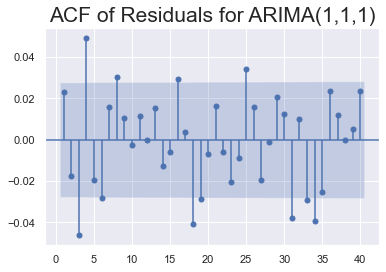

In [35]:
df['res_ar_1_i_1_ma_1'] = results_ar_1_i_1_ma_1.resid
sgt.plot_acf(df.res_ar_1_i_1_ma_1[1:], zero = False, lags = 40)
plt.title("ACF of Residuals for ARIMA(1,1,1)", size = 21)
plt.show()

COMMENTS:
     - La función de autocorrelación muestra barras significativas hasta el tercer y cuarto periodo.
     - Esto nos indica que el modelo puede ser complejizado

### HIGHER-Lag ARIMA Models

In [36]:
model_ar_1_i_1_ma_2 = ARIMA(df.market_value, order = (1,1,2))
results_ar_1_i_1_ma_2 = model_ar_1_i_1_ma_2.fit()


model_ar_1_i_1_ma_3 = ARIMA(df.market_value, order = (1,1,3))
results_ar_1_i_1_ma_3 = model_ar_1_i_1_ma_3.fit()


model_ar_2_i_1_ma_1 = ARIMA(df.market_value, order = (2,1,1))
results_ar_2_i_1_ma_1 = model_ar_2_i_1_ma_1.fit()


model_ar_3_i_1_ma_1 = ARIMA(df.market_value, order = (3,1,1))
results_ar_3_i_1_ma_1 = model_ar_3_i_1_ma_1.fit()


model_ar_3_i_1_ma_2 = ARIMA(df.market_value, order = (3,1,2))
results_ar_3_i_1_ma_2 = model_ar_3_i_1_ma_2.fit(start_ar_lags = 5)

In [37]:
print("ARIMA(1,1,1): \t LL = ", results_ar_1_i_1_ma_1.llf, "\t AIC = ", results_ar_1_i_1_ma_1.aic)
print("ARIMA(1,1,2): \t LL = ", results_ar_1_i_1_ma_2.llf, "\t AIC = ", results_ar_1_i_1_ma_2.aic)
print("ARIMA(1,1,3): \t LL = ", results_ar_1_i_1_ma_3.llf, "\t AIC = ", results_ar_1_i_1_ma_3.aic)
print("ARIMA(2,1,1): \t LL = ", results_ar_2_i_1_ma_1.llf, "\t AIC = ", results_ar_2_i_1_ma_1.aic)
print("ARIMA(3,1,1): \t LL = ", results_ar_3_i_1_ma_1.llf, "\t AIC = ", results_ar_3_i_1_ma_1.aic)
print("ARIMA(3,1,2): \t LL = ", results_ar_3_i_1_ma_2.llf, "\t AIC = ", results_ar_3_i_1_ma_2.aic)

ARIMA(1,1,1): 	 LL =  -27603.666412766175 	 AIC =  55215.33282553235
ARIMA(1,1,2): 	 LL =  -27600.081863166255 	 AIC =  55210.16372633251
ARIMA(1,1,3): 	 LL =  -27590.42403252814 	 AIC =  55192.84806505628
ARIMA(2,1,1): 	 LL =  -27599.807487855556 	 AIC =  55209.61497571111
ARIMA(3,1,1): 	 LL =  -27592.05537170045 	 AIC =  55196.1107434009
ARIMA(3,1,2): 	 LL =  -27590.660808969813 	 AIC =  55195.321617939626


In [38]:
# Como el ARIMA(1,1,3) está anidado a los anteriores debemos hacer la prueba

print("\nLLR test p-value = " + str(LLR_test(results_ar_1_i_1_ma_2, results_ar_1_i_1_ma_3)))



LLR test p-value = 0.0


In [40]:
print("\nLLR test p-value = " + str(LLR_test(results_ar_1_i_1_ma_1, results_ar_1_i_1_ma_3, DF = 2)))



LLR test p-value = 0.0


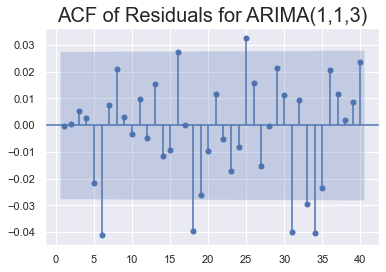

In [41]:
# Debemos analizar si los residuos corresponden a Ruido Blanco
df['res_ar_1_i_ma_3'] = results_ar_1_i_1_ma_3.resid
sgt.plot_acf(df.res_ar_1_i_ma_3[1:], zero = False, lags = 40)
plt.title("ACF of Residuals for ARIMA(1,1,3)", size = 20)
plt.show()


COMMENTS : Al parecer debemos seguir probando TODAS las combinaciones hasta el sexto rezago, es decir, ARIMA(6,1,6).

In [44]:
model_ar_5_i_1_ma_1 = ARIMA(df.market_value, order = (5,1,1))
results_ar_5_i_1_ma_1 = model_ar_5_i_1_ma_1.fit(start_ar_lags = 11)
results_ar_5_i_1_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:         D.market_value   No. Observations:                 5020
Model:                 ARIMA(5, 1, 1)   Log Likelihood              -27586.512
Method:                       css-mle   S.D. of innovations             58.932
Date:                Mon, 24 Jan 2022   AIC                          55189.024
Time:                        12:25:19   BIC                          55241.193
Sample:                    01-10-1994   HQIC                         55207.305
                         - 04-05-2013                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.5663      0.690      0.820      0.412      -0.787       1.919
ar.L1.D.market_value     0.4011      0.159      2.529      0.011       0.090       0.712
ar.L2.D.market_value    -0.0445      0.016     -2.856      0.004      -0.075      -0.014
ar.L3.D.market_value    -0.0543      0.017     -3.163      0.002      -0.088      -0.021
ar.L4.D.market_value     0.0586      0.019      3.069      0.002       0.021       0.096
ar.L5.D.market_value    -0.0581      0.014     -4.118      0.000      -0.086      -0.030
ma.L1.D.market_value    -0.4213      0.158     -2.659      0.008      -0.732      -0.111
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.7609           -0.0000j            1.7609           -0.5000
AR.2            1.4633           -0.8605j            1.6975           -0.0846
AR.3            1.4633           +0.8605j            1.6975            0.0846
AR.4           -0.0790           -1.8393j            1.8410           -0.2568
AR.5           -0.0790           +1.8393j            1.8410            0.2568
MA.1            2.3734           +0.0000j            2.3734            0.0000
-----------------------------------------------------------------------------
"""

In [47]:
print("ARIMA(1,1,3): \t LL = ", results_ar_1_i_1_ma_3.llf, "\t AIC = ", results_ar_1_i_1_ma_3.aic)
print("ARIMA(5,1,1): \t LL = ", results_ar_5_i_1_ma_1.llf, "\t AIC = ", results_ar_5_i_1_ma_1.aic)

ARIMA(1,1,3): 	 LL =  -27590.42403252814 	 AIC =  55192.84806505628
ARIMA(5,1,1): 	 LL =  -27586.511888106317 	 AIC =  55189.023776212634


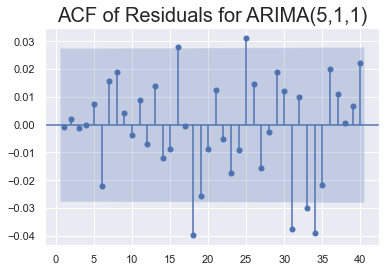

In [48]:
df['res_ar_5_i_1_ma_1'] = results_ar_5_i_1_ma_1.resid
sgt.plot_acf(df.res_ar_5_i_1_ma_1[1:], zero = False, lags = 40)
plt.title("ACF of Residuals for ARIMA(5,1,1)", size = 20)
plt.show()


COMMENTS : Es un buen modelo ya que al añadir solo 5 retrasos estamos capturando los efectos de hasta el 6 y más retrasos.
añadir más retrasos implicaría reducir el poder predictivo del modelo haciéndolo más dependiente de la data de entrenamiento.

## Models with Higher Levels of Integration

Integrar una serie nos ayuda a transformarla en estacionaria, por lo que añadir capaz de integración es innecesario.
Ahora veremos cómo podemos descubrir si la serie integrada resulta en una serie estacionaria o no.


In [49]:
df['delta_prices'] = df.market_value.diff(1)

In [52]:
model_ar_1_i_0_ma_1 = ARIMA(df.delta_prices[1:], order = (1,0,1))
results_ar_1_i_0_ma_1 = model_ar_1_i_0_ma_1.fit()
results_ar_1_i_0_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           delta_prices   No. Observations:                 5020
Model:                     ARMA(1, 1)   Log Likelihood              -27603.666
Method:                       css-mle   S.D. of innovations             59.134
Date:                Mon, 24 Jan 2022   AIC                          55215.333
Time:                        12:42:09   BIC                          55241.418
Sample:                    01-10-1994   HQIC                         55224.473
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.5655      0.682      0.829      0.407      -0.772       1.903
ar.L1.delta_prices     0.7475      0.070     10.652      0.000       0.610       0.885
ma.L1.delta_prices    -0.7936      0.064    -12.378      0.000      -0.919      -0.668
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.3378           +0.0000j            1.3378            0.0000
MA.1            1.2601           +0.0000j            1.2601            0.0000
-----------------------------------------------------------------------------
"""

In [54]:
model_ar_1_i_1_ma_1 = ARIMA(df.market_value, order = (1,1,1))
results_ar_1_i_1_ma_1 = model_ar_1_i_1_ma_1.fit()
results_ar_1_i_1_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:         D.market_value   No. Observations:                 5020
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -27603.666
Method:                       css-mle   S.D. of innovations             59.134
Date:                Mon, 24 Jan 2022   AIC                          55215.333
Time:                        12:42:50   BIC                          55241.418
Sample:                    01-10-1994   HQIC                         55224.473
                         - 04-05-2013                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.5655      0.682      0.829      0.407      -0.772       1.903
ar.L1.D.market_value     0.7475      0.070     10.652      0.000       0.610       0.885
ma.L1.D.market_value    -0.7936      0.064    -12.378      0.000      -0.919      -0.668
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.3378           +0.0000j            1.3378            0.0000
MA.1            1.2601           +0.0000j            1.2601            0.0000
-----------------------------------------------------------------------------
"""

In [56]:
sts.adfuller(df.delta_prices[1:])

(-32.24409349570748,
 0.0,
 5,
 5014,
 {'1%': -3.4316548765428174,
  '5%': -2.8621166146845334,
  '10%': -2.5670769326348926},
 54845.96104221891)

Nota que con un paso de integración  la serie se vuelve estacionaria. No necesitamos otra capa de integración por lo que no se recomiendan ajustar más integraciones.

No es recomendable usar ARIMA para datos estacionarios ya que es muy costoso en la definición de coeficientes analíticamente.

Hay desgaste de datos por capas de integración.

Diferenciar los datos de cero.

modelos pueden fallar.

Inestabilidad numérica por los ceros después de la coma.

Difícil interpretación entre más capas de integración

# ARMAX & ARIMAX

Añadimos otros factores diferentes a los rezagos o a los residuos


$ARMAX$
$$x_t = c + \beta Y + \varphi_1 x_{t-1} + \theta_1 \epsilon_{t-1} + \epsilon_t$$

$ARIMAX$
$$\Delta x_t = c + \beta Y + \varphi \Delta x_{t-1} + \theta_1 \epsilon {t-1} + \epsilon_t$$



$Y$ son nuevos datos, una variable o una combinación de variables que pueda afectar a mi variable original
corresponden a Variables exógenas

## ARIMAX

 - Agregando como variable exógena los precios spsx

In [69]:
model_ar_1_i_ma_1_Xspx = ARIMA(df.market_value, exog = df.spx, order = (1,1,1))
results_ar_1_i_1_ma_1_Xspx = model_ar_1_i_ma_1_Xspx.fit()
results_ar_1_i_1_ma_1_Xspx.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:         D.market_value   No. Observations:                 5020
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -27603.556
Method:                       css-mle   S.D. of innovations             59.132
Date:                Mon, 24 Jan 2022   AIC                          55217.112
Time:                        13:17:20   BIC                          55249.718
Sample:                    01-10-1994   HQIC                         55228.538
                         - 04-05-2013                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.5858      2.655     -0.221      0.825      -5.790       4.619
spx                      0.0011      0.002      0.450      0.653      -0.004       0.006
ar.L1.D.market_value     0.7456      0.070     10.577      0.000       0.607       0.884
ma.L1.D.market_value    -0.7917      0.065    -12.273      0.000      -0.918      -0.665
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.3412           +0.0000j            1.3412            0.0000
MA.1            1.2632           +0.0000j            1.2632            0.0000
-----------------------------------------------------------------------------
"""

In [79]:
df.head()

,spx,dax,ftse,nikkei,market_value
date,,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01,3445.98
1994-01-10,475.27,2225.00,3440.58,18443.44,3440.58
1994-01-11,474.13,2228.10,3413.77,18485.25,3413.77
1994-01-12,474.17,2182.06,3372.02,18793.88,3372.02
1994-01-13,472.47,2142.37,3360.01,18577.26,3360.01


In [84]:
dfexog = df[['spx', 'dax', 'nikkei']]
dfexog.head()

,spx,dax,nikkei
date,,,
1994-01-07,469.90,2224.95,18124.01
1994-01-10,475.27,2225.00,18443.44
1994-01-11,474.13,2228.10,18485.25
1994-01-12,474.17,2182.06,18793.88
1994-01-13,472.47,2142.37,18577.26


In [85]:
model_ar_1_i_ma_1_Xspx = ARIMA(df.market_value, exog = dfexog, order = (1,1,1))
results_ar_1_i_1_ma_1_Xspx = model_ar_1_i_ma_1_Xspx.fit()
results_ar_1_i_1_ma_1_Xspx.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:         D.market_value   No. Observations:                 5020
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -27602.578
Method:                       css-mle   S.D. of innovations             59.121
Date:                Mon, 24 Jan 2022   AIC                          55219.156
Time:                        13:24:03   BIC                          55264.804
Sample:                    01-10-1994   HQIC                         55235.152
                         - 04-05-2013                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -4.7476      4.327     -1.097      0.273     -13.228       3.733
spx                      0.0097      0.006      1.633      0.103      -0.002       0.021
dax                     -0.0014      0.001     -1.419      0.156      -0.003       0.001
nikkei                   0.0001      0.000      0.719      0.472      -0.000       0.000
ar.L1.D.market_value     0.7483      0.071     10.597      0.000       0.610       0.887
ma.L1.D.market_value    -0.7949      0.065    -12.319      0.000      -0.921      -0.668
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.3363           +0.0000j            1.3363            0.0000
MA.1            1.2580           +0.0000j            1.2580            0.0000
-----------------------------------------------------------------------------
"""

# SARIMAX

- Variantes con estacionalidad: SAR, SMA, SARMA, SARIMA, SARIMAX

- La S la agregamos para indicar el componente estacional.Estacionalidad ocurre cuando patrones aparecen periodicamente.

- AR no captura estacionalidad ya que toma valores previos sobreestimando o subestimando la predicción.

- AR: $$x_t = c + \varphi_1 x_{t-1} + \epsilon_t$$

- SAR: $$x_t = c + \varphi_1 x_{t-1}+ \phi_1 x_{t-12} + \phi_2 x_{t-24} + \epsilon_t$$

- ARIMAX (p,d,q)

- SARIMAX (p,d,q)(P,D,Q,s) este último es el componente estacional.
  
  - Ejemplo: (1,0,2)(2,0,1,5)
  
  $$x_t=c+\varphi_1 x_{t-1}+\theta_1 \epsilon_{t-1}+ \theta_2 \epsilon_{t-2}+\phi_1(x_{t-5}+x_{t-6}) +
  \phi_2(x_{t-10}+x_{t-11}) + \Theta_1(\epsilon_{t-5} + \epsilon_{t-6}+\epsilon_{t-7}) + \epsilon_t$$
  
  
    - Nota que deberíamos tener P+Q+p+q coeficientes.
  







## SARIMAX

In [1]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [11]:
model_sarimax = SARIMAX(df.market_value, exog = df.spx, order = (1,0,1), seasonal_order = (2,0,1,5))
results_sarimax = model_sarimax.fit()
results_sarimax.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                      market_value   No. Observations:                 5021
Model:             SARIMAX(1, 0, 1)x(2, 0, 1, 5)   Log Likelihood              -26712.703
Date:                           Tue, 25 Jan 2022   AIC                          53439.405
Time:                                   10:51:52   BIC                          53485.055
Sample:                               01-07-1994   HQIC                         53455.402
                                    - 04-05-2013                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
spx            2.7063      0.035     76.523      0.000       2.637       2.776
ar.L1          0.9998      0.000   2098.393      0.000       0.999       1.001
ma.L1         -0.3104      0.010    -32.635      0.000      -0.329      -0.292
ar.S.L5        0.9651      0.011     87.193      0.000       0.943       0.987
ar.S.L10       0.0345      0.010      3.336      0.001       0.014       0.055
ma.S.L5       -0.9986      0.006   -178.590      0.000      -1.010      -0.988
sigma2      2439.7642     28.482     85.660      0.000    2383.941    2495.588
===================================================================================
Ljung-Box (L1) (Q):                   1.63   Jarque-Bera (JB):              4209.48
Prob(Q):                              0.20   Prob(JB):                         0.00
Heteroskedasticity (H):               1.23   Skew:                            -0.52
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.36
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""